# **Importing Needed Libraries**

In [1]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

# **Loading Data**

In [2]:
df = pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")

In [3]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [4]:
df.shape

(569, 33)

# **Cleaning & Analysis**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [8]:
df['diagnosis'].replace({"B":"0", "M":"1"}, inplace=True)

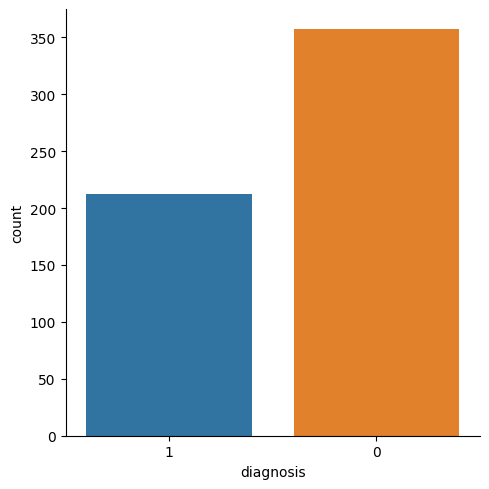

In [9]:
sns.catplot(x='diagnosis', data=df, kind='count')

In [10]:
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

In [11]:
df.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [13]:
# sns.pairplot(df, hue='diagnosis')

In [14]:
df['diagnosis'] = df['diagnosis'].astype(float)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    float64
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [16]:
correlation = df.corr()

<Axes: >

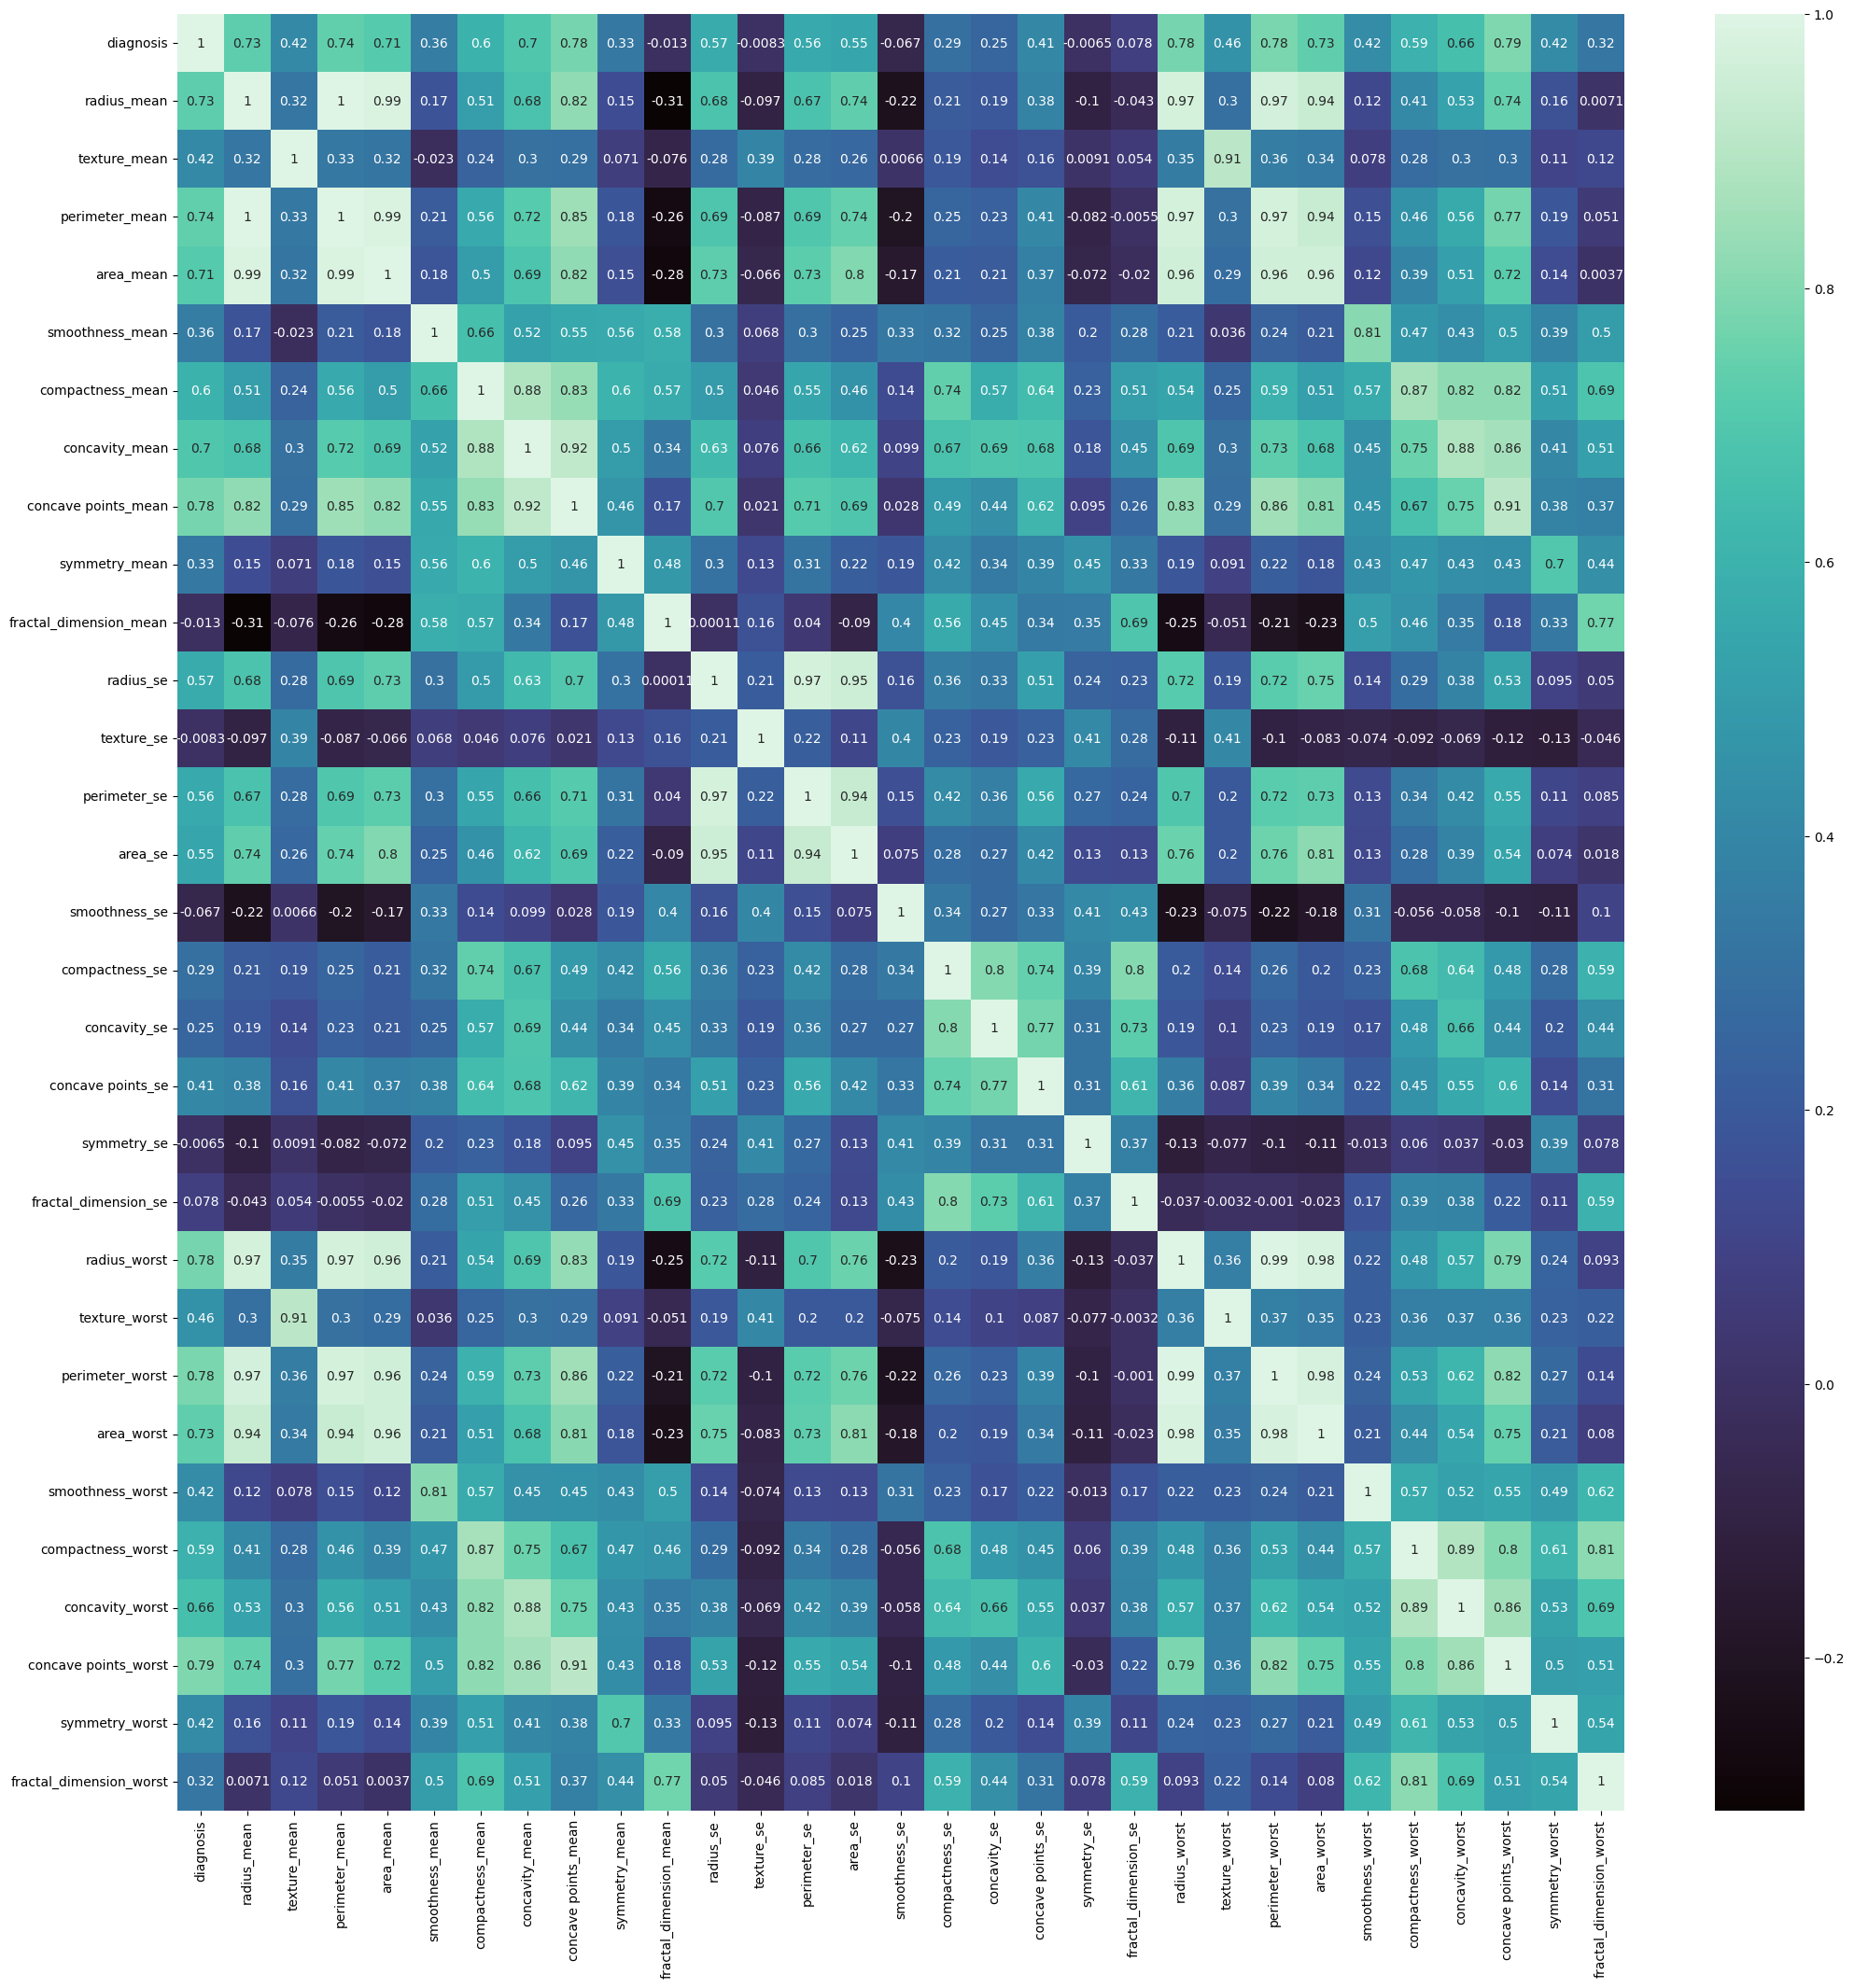

In [17]:
plt.figure(figsize=(25,25))
sns.heatmap(correlation, annot=True, cmap='mako')

<Figure size 1000x800 with 0 Axes>

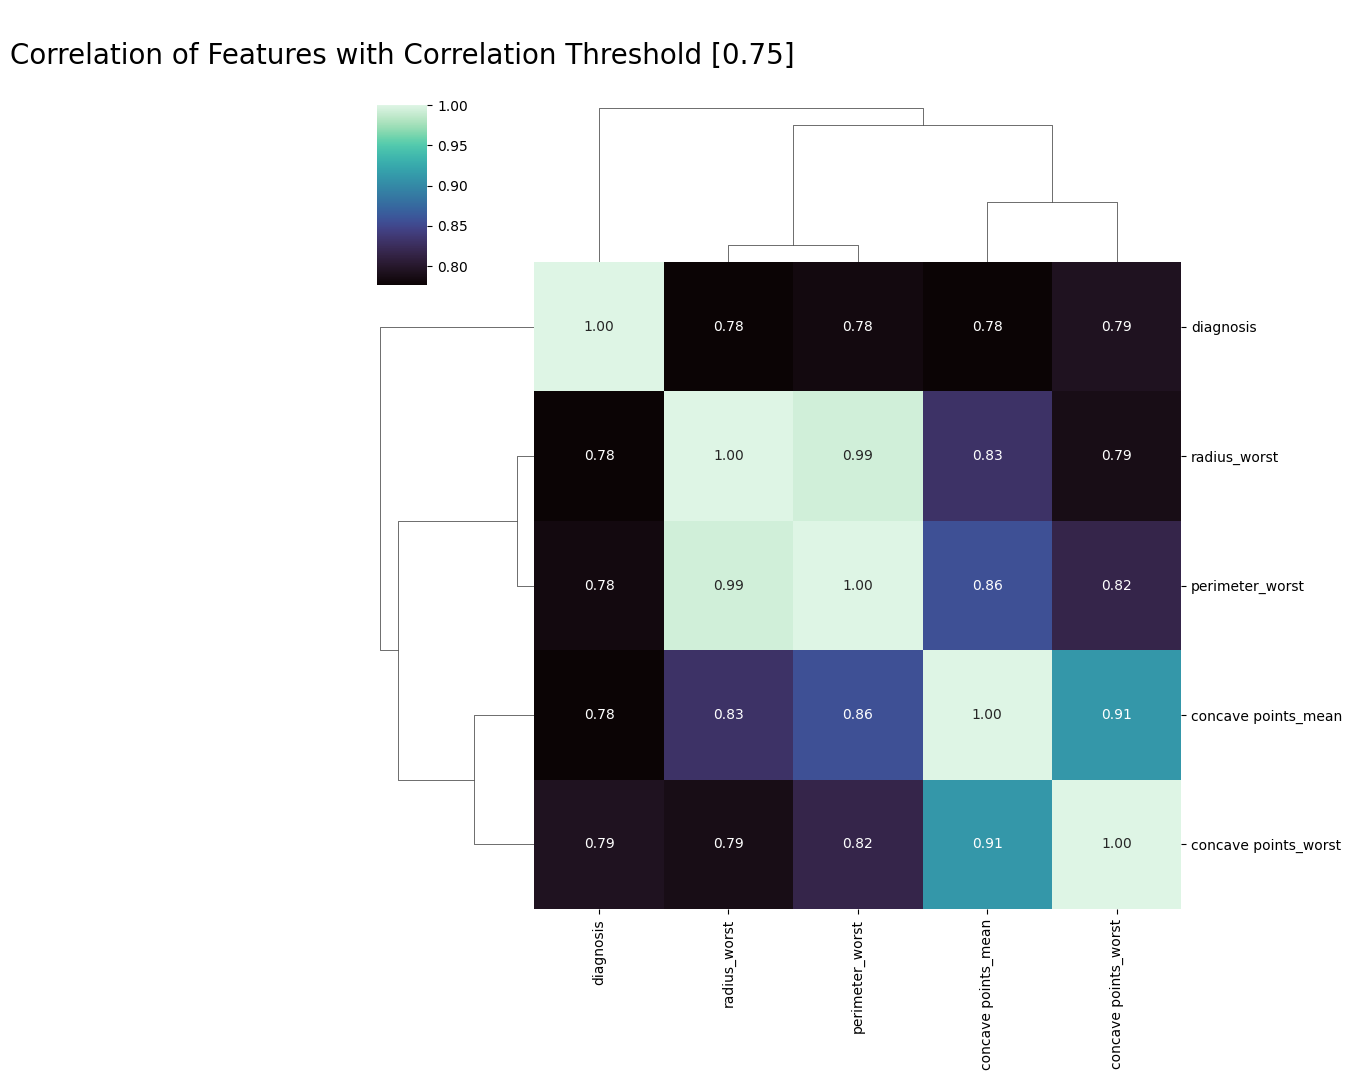

In [18]:
threshold = 0.75
filter = np.abs(correlation["diagnosis"] > threshold)
correlation_features = correlation.columns[filter].tolist()
plt.figure(figsize=(10,8))
sns.clustermap(df[correlation_features].corr(), annot = True, fmt = ".2f", cmap='mako')
plt.title("\nCorrelation of Features with Correlation Threshold [0.75]\n",fontsize=20)
plt.show()

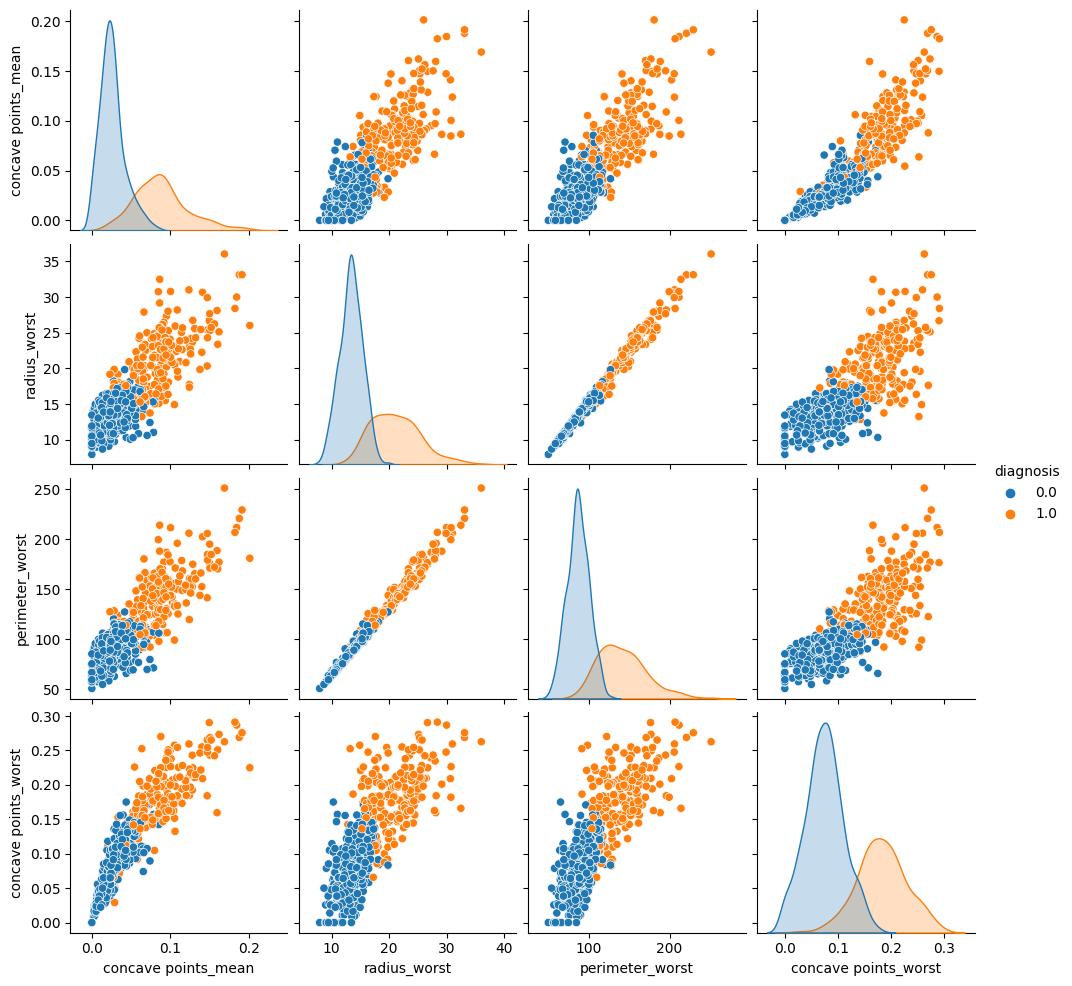

In [19]:
sns.pairplot(df[correlation_features], diag_kind = "kde",  hue="diagnosis")
plt.show()

# **Model**

In [20]:
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
s = StandardScaler()

X_train = s.fit_transform(X_train)
X_test = s.fit_transform(X_test)

In [23]:
Algorithm = ['RandomForestClassifier','DecisionTreeClassifier','KNeighborsClassifier','LogisticRegression','Naive Bayes']
Accuracy=[]

In [24]:
def algorithm(model):
  model.fit(X_train, y_train)
  prediction = model.predict(X_test)

  accuracy = accuracy_score(y_test,prediction)

  print('confusion matrix')
  cm = confusion_matrix(y_test,prediction)


  group_names = ["True Negative","False Positive",'False Negative',"True Positive"]
  group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
  group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

  plt.title("Confusion Matrix")
  plt.xlabel('predicted label')
  plt.ylabel('True label')
  plt.show()


  print('Normalized confusion matrix')
  cm1 = confusion_matrix(y_test,prediction, normalize='true')

  group_names = ["True Negative","False Positive",'False Negative',"True Positive"]
  group_counts = ['{0:0.0f}'.format(value) for value in cm1.flatten()]
  group_percentages = ['{0:.2%}'.format(value) for value in cm1.flatten()/np.sum(cm1)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

  plt.title("Confusion Matrix")
  plt.xlabel('predicted label')
  plt.ylabel('True label')
  plt.show()

  print(cm)
  print(classification_report(y_test,prediction))
  final_score = accuracy*100
  print('accuracy_score : ' , final_score)

  Accuracy.append(accuracy*100)

**Random Forest Classification**

confusion matrix


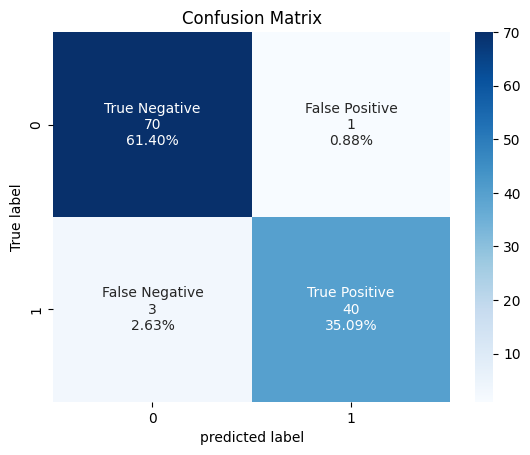

Normalized confusion matrix


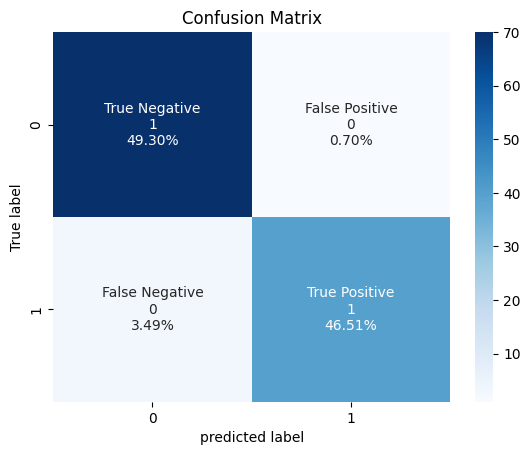

[[70  1]
 [ 3 40]]
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97        71
         1.0       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

accuracy_score :  96.49122807017544


In [25]:
model_1 = RandomForestClassifier(n_estimators=100)
algorithm(model_1)

**Decision Tree**

confusion matrix


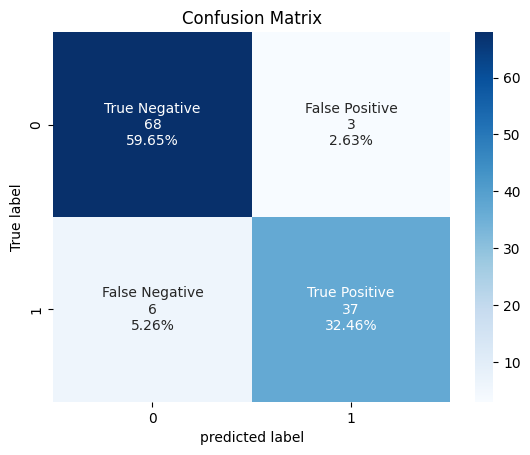

Normalized confusion matrix


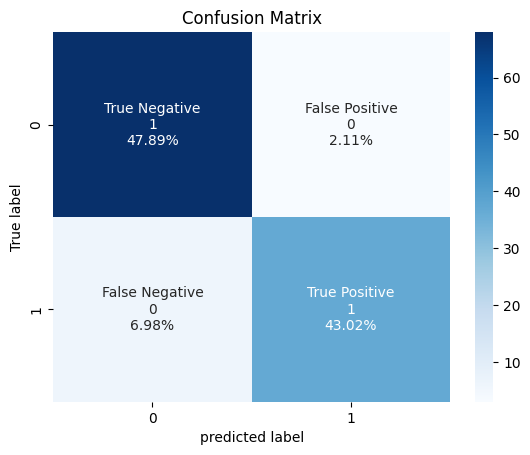

[[68  3]
 [ 6 37]]
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94        71
         1.0       0.93      0.86      0.89        43

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114

accuracy_score :  92.10526315789474


In [26]:
model_2 = DecisionTreeClassifier(random_state=42)
algorithm(model_2)

**K Nearest Neighbor**

confusion matrix


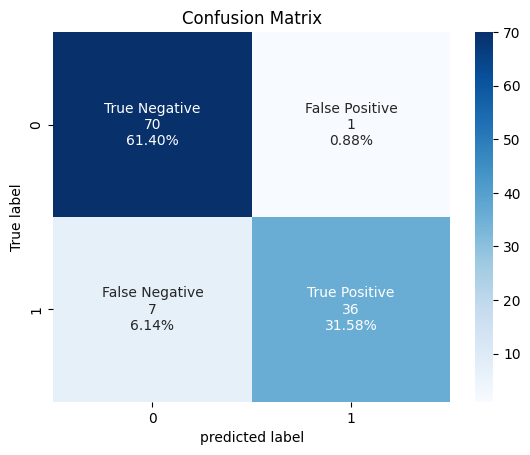

Normalized confusion matrix


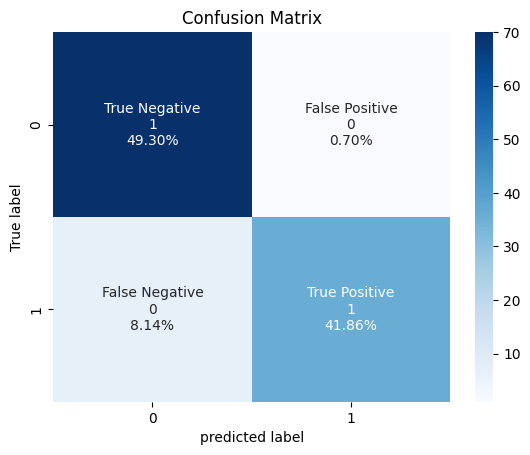

[[70  1]
 [ 7 36]]
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95        71
         1.0       0.97      0.84      0.90        43

    accuracy                           0.93       114
   macro avg       0.94      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114

accuracy_score :  92.98245614035088


In [27]:
model_3 = KNeighborsClassifier(n_neighbors=2)
algorithm(model_3)

**Logistic Regression**

confusion matrix


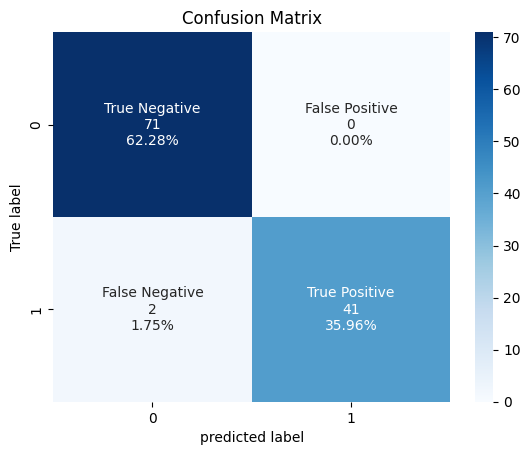

Normalized confusion matrix


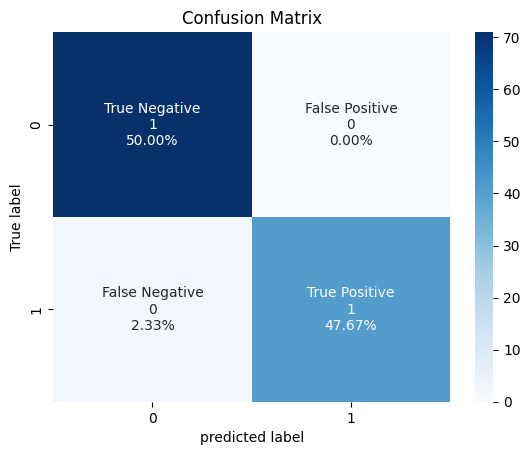

[[71  0]
 [ 2 41]]
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99        71
         1.0       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

accuracy_score :  98.24561403508771


In [28]:
model_4 = LogisticRegression()
algorithm(model_4)

**Naive Bayes**

confusion matrix


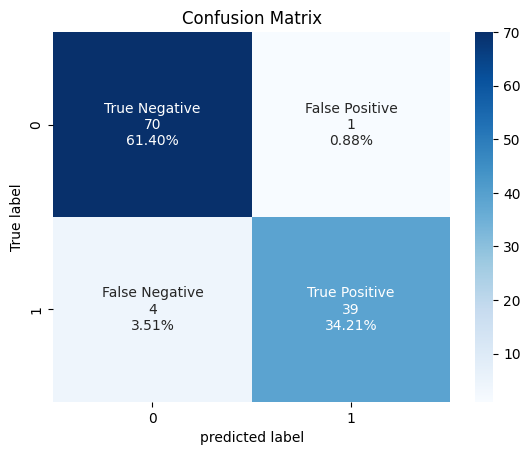

Normalized confusion matrix


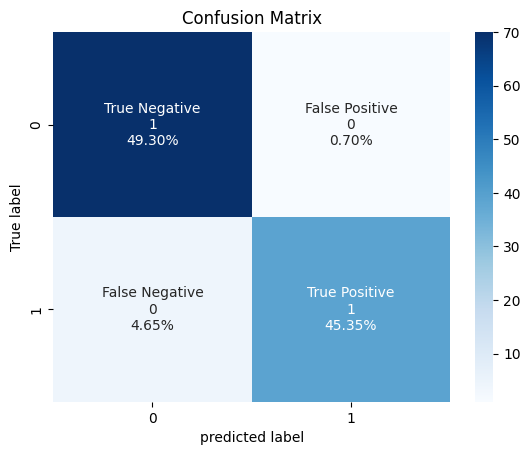

[[70  1]
 [ 4 39]]
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97        71
         1.0       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

accuracy_score :  95.6140350877193


In [29]:
model_5 = GaussianNB()
algorithm(model_5)

In [30]:
print(Accuracy)

[96.49122807017544, 92.10526315789474, 92.98245614035088, 98.24561403508771, 95.6140350877193]


In [31]:
score = pd.DataFrame({'Algorithm':Algorithm,'Accuracy':Accuracy })
score

,Algorithm,Accuracy
0,RandomForestClassifier,96.491228
1,DecisionTreeClassifier,92.105263
2,KNeighborsClassifier,92.982456
3,LogisticRegression,98.245614
4,Naive Bayes,95.614035


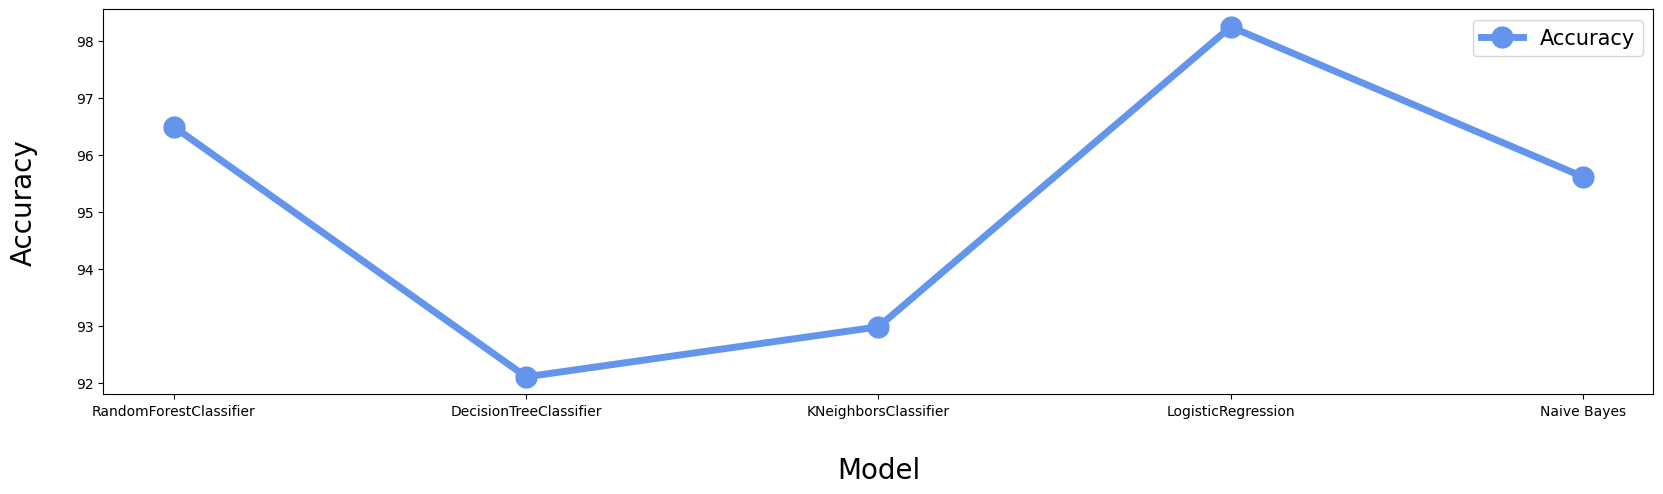

In [32]:
fig = plt.figure(figsize=(20,5))
plt.plot(score.Algorithm,score.Accuracy,label='Accuracy',lw=5,color='CornflowerBlue',marker='o',markersize = 15)
plt.legend(fontsize=15)
plt.xlabel('\nModel',fontsize= 20)
plt.ylabel('Accuracy\n',fontsize= 20)
plt.show()